80th percentile of DM sends for closed-won/onboarded leads: 13


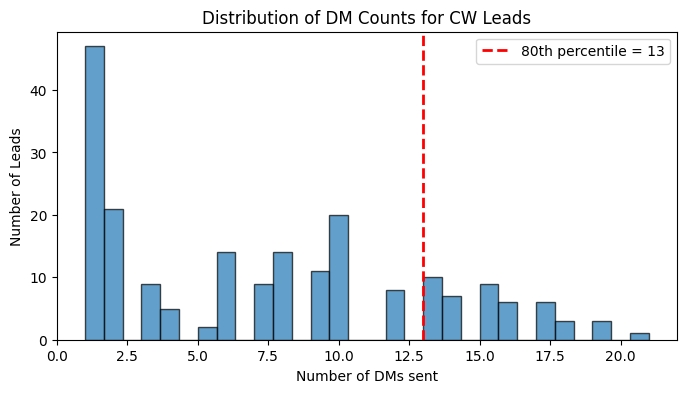

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load your leads summary (adjust path to wherever you saved it)
leads = pd.read_csv(
    "/Users/yukachen/marketing-operation/campaign_touch_points/data/Brizo __ Leads - data.csv",
    dtype={"brizo_id": str, "count": float},
    low_memory=False
)

# 2) Filter to only the CW group
cw = leads[ leads["stage"].str.lower().isin(["closed won", "onboarded"]) ]

# 3) Compute the 80th percentile of their DM counts
pct80 = cw["count"].quantile(0.8)
print(f"80th percentile of DM sends for closed-won/onboarded leads: {pct80:.0f}")

# 4) Plot the distribution and mark the 80th percentile
plt.figure(figsize=(8,4))
plt.hist(cw["count"], bins=30, alpha=0.7, edgecolor='black')
plt.axvline(pct80, color='red', linestyle='--', linewidth=2,
            label=f'80th percentile = {pct80:.0f}')
plt.title("Distribution of DM Counts for CW Leads")
plt.xlabel("Number of DMs sent")
plt.ylabel("Number of Leads")
plt.legend()
plt.show()

In [14]:
import pandas as pd
import janitor

landing_date = pd.read_csv('data/brizo_list_landing_date.csv').clean_names()

leads = pd.read_csv('data/exported_date/deduped_leads_long.csv').clean_names()
brizo = pd.read_csv('data/exported_date/combined.csv').clean_names()

In [15]:
selected_leads = leads[['lead_id','mobile_primary',
                        'business_phone_line_1','brizo_id', 
                        'created_date',
                        'first_mel_timestamp','latest_mql_timestamp',
                        'assigned_time_ae_',
                        'opportunity_created_date',
                        'closed_won_date',
                        'stage','unqualified_reason', 'closed_lost_reason']].drop_duplicates()

In [16]:
brizo_landing_date = brizo.merge(landing_date, on='list_source', how='left')

In [19]:
match_brizo = brizo_landing_date.merge(
    selected_leads,
    on='brizo_id',
    how='inner'
)

In [18]:
print(match_brizo.columns)

Index(['lead_id', 'mobile_primary', 'business_phone_line_1', 'brizo_id',
       'created_date', 'first_mel_timestamp', 'latest_mql_timestamp',
       'assigned_time_ae_', 'opportunity_created_date', 'closed_won_date',
       'stage', 'unqualified_reason', 'closed_lost_reason', 'phone_number',
       'list_source', 'year_month', 'landing_start_date', 'landing_end_date'],
      dtype='object')


In [ ]:
after_closed_won = match_brizo[match_brizo['closed_won_date'] > match_brizo['landing_start_date']]

after_closed_won_id_phone = after_closed_won[['brizo_id']]

after_closed_won_id_phone_counts = (
    after_closed_won_id_phone
      .groupby(['brizo_id'])
      .size()
      .reset_index(name='count')
)
display(after_closed_won_id_phone_counts)

,brizo_id,count
0,020cc38031d71c90,3
1,02cf7f8f4f6d36f0,6
2,05c988dd31b8a82d,15
3,06297172ff7cfa89,3
4,067e482f037261dc,3
...,...,...
181,fc05c9cc577242cf,2
182,fc211d11bfc3cc84,15
183,fd74c5661bc90b04,2
184,fd87102fe31eedcd,1


In [24]:
check = match_brizo[['brizo_id', 'phone_number', 'landing_start_date', 'closed_won_date']].drop_duplicates().dropna(subset=['closed_won_date'])
check.to_csv('data/exported_data/check.csv', index=False)

In [44]:
b4_closed_won = match_brizo[match_brizo['closed_won_date'] > match_brizo['landing_start_date']]

b4_closed_won_id_phone = b4_closed_won[['brizo_id']]

b4_closed_won_id_phone_counts = (
    b4_closed_won_id_phone
      .groupby(['brizo_id'])
      .size()
      .reset_index(name='count')
)
display(b4_closed_won_id_phone_counts)

# Save the results
b4_closed_won_id_phone_counts.to_csv('data/exported_data/b4_closed_won_id_phone_counts.csv', index=False)

,brizo_id,count
0,020cc38031d71c90,3
1,02cf7f8f4f6d36f0,6
2,05c988dd31b8a82d,15
3,06297172ff7cfa89,3
4,067e482f037261dc,3
...,...,...
118,f1d8cf0a7aa3cda6,2
119,f6bb2314b36d1b70,1
120,f8d8798d9aeb4875,8
121,fc211d11bfc3cc84,15


In [43]:
b4_sql = match_brizo[match_brizo['opportunity_created_date'] > match_brizo['landing_start_date']]

b4_sql_id_phone = b4_sql[['brizo_id']]

b4_sql_id_phone_counts = (
    b4_sql_id_phone
      .groupby(['brizo_id'])
      .size()
      .reset_index(name='count')
)
display(b4_sql_id_phone_counts)

b4_sql_id_phone_counts.to_csv('data/exported_data/b4_sql_id_phone_counts.csv', index=False)



,brizo_id,count
0,020cc38031d71c90,3
1,02cf7f8f4f6d36f0,6
2,05c988dd31b8a82d,15
3,06297172ff7cfa89,3
4,067e482f037261dc,3
...,...,...
128,f1d8cf0a7aa3cda6,2
129,f6bb2314b36d1b70,1
130,f8d8798d9aeb4875,8
131,fc211d11bfc3cc84,15


In [41]:
b4_mql = match_brizo[match_brizo['latest_mql_timestamp'] > match_brizo['landing_start_date']]

b4_mql_id_phone = b4_mql[['brizo_id']]

b4_mql_id_phone_counts = (
    b4_mql_id_phone
      .groupby(['brizo_id'])
      .size()
      .reset_index(name='count')
)
display(b4_mql_id_phone_counts)



b4_mql_id_phone_counts.to_csv('data/exported_data/b4_mql_id_phone_counts.csv', index=False)


,brizo_id,count
0,01e43677fc2db22f,1
1,02cf7f8f4f6d36f0,3
2,05c988dd31b8a82d,8
3,06297172ff7cfa89,6
4,067e482f037261dc,6
...,...,...
128,f0743ddea15cadc2,2
129,f1d8cf0a7aa3cda6,4
130,f8d8798d9aeb4875,8
131,fc211d11bfc3cc84,8


In [40]:
b4_mel = b4_mql[match_brizo['first_mel_timestamp'] > match_brizo['landing_start_date']]

b4_mel_id_phone = b4_mel[['brizo_id']]

b4_mel_id_phone_counts = (
    b4_mel_id_phone
      .groupby(['brizo_id'])
      .size()
      .reset_index(name='count')
)
display(b4_mel_id_phone_counts)

b4_mel_id_phone_counts.to_csv('data/exported_data/b4_mel_id_phone_counts.csv', index=False)


/var/folders/8c/z2jj76jx2wq4dxt7jlmgxknm0000gn/T/ipykernel_803/1826904608.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  b4_mel = b4_mql[match_brizo['first_mel_timestamp'] > match_brizo['landing_start_date']]


,brizo_id,count
0,02cf7f8f4f6d36f0,3
1,05c988dd31b8a82d,8
2,06297172ff7cfa89,3
3,067e482f037261dc,3
4,09f45c50e2bb45a9,1
...,...,...
99,f0743ddea15cadc2,1
100,f1d8cf0a7aa3cda6,2
101,f8d8798d9aeb4875,8
102,fc211d11bfc3cc84,8
